In [4]:
#1. Load the Data
import pandas as pd

train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [5]:
#Check missing values:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


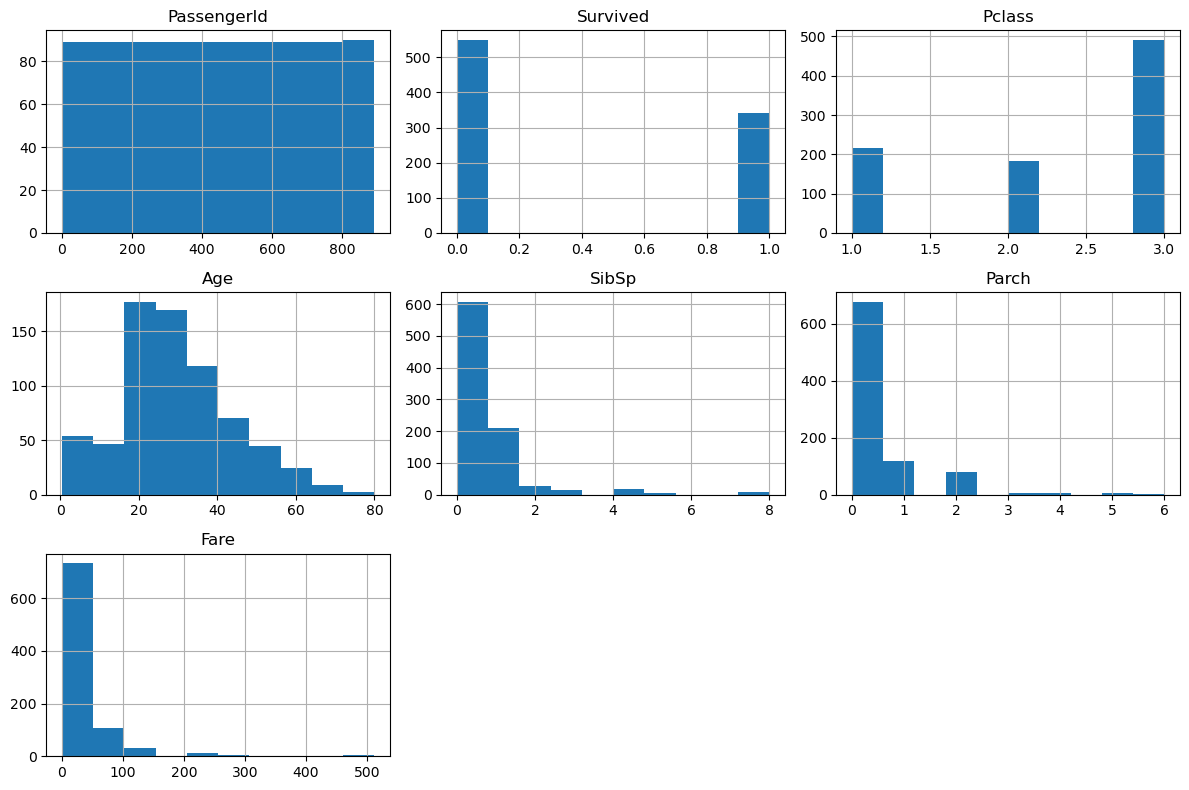

<Axes: >

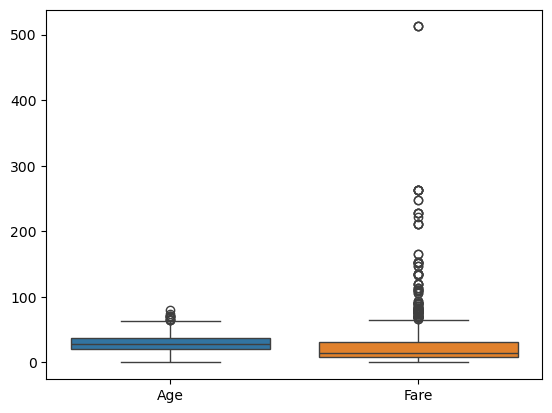

In [6]:
#Histograms and box plots:
import seaborn as sns
import matplotlib.pyplot as plt

train_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

sns.boxplot(data=train_df[['Age', 'Fare']])

<Axes: xlabel='Survived', ylabel='count'>

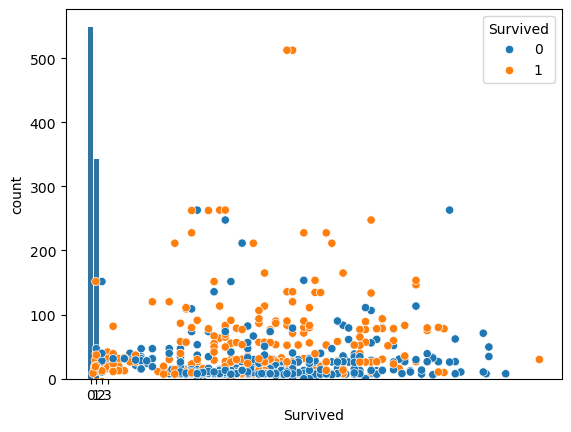

In [7]:
#Scatter and bar plots:
sns.countplot(x='Survived', data=train_df)
sns.barplot(x='Pclass', y='Survived', data=train_df)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)

In [8]:
#Data Preprocessing
#Impute missing values:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\APPY\AppData\Local\Temp\ipykernel_1044\3438298629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\APPY\AppData\Local\Temp\ipykernel_1044\3438298629.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
#Encode categorical variables:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)


In [10]:
#Drop irrelevant columns:
train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)


In [12]:
# Build Predictive Models
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#LightGBM Model:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [14]:
#XGBoost Model:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)


C:\Users\APPY\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{model_name} Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"{model_name} Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"{model_name} F1-score: {f1_score(y_true, y_pred):.4f}")

evaluate_model(y_val, lgb_preds, "LightGBM")
evaluate_model(y_val, xgb_preds, "XGBoost")

LightGBM Accuracy: 0.8268
LightGBM Precision: 0.7945
LightGBM Recall: 0.7838
LightGBM F1-score: 0.7891
XGBoost Accuracy: 0.8212
XGBoost Precision: 0.8000
XGBoost Recall: 0.7568
XGBoost F1-score: 0.7778


<Figure size 1000x600 with 0 Axes>

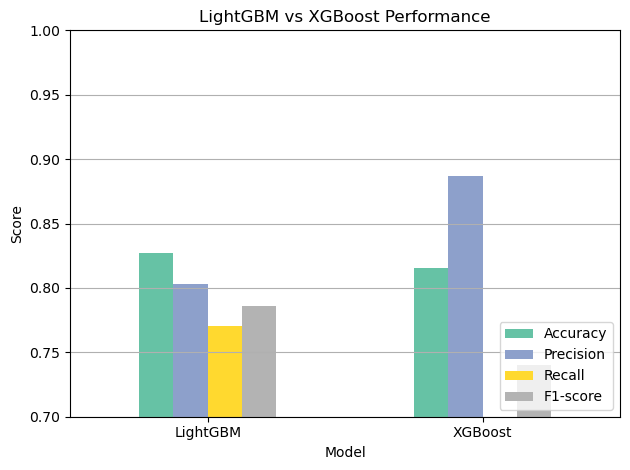

In [19]:
# Bar Plot for Performance Metrics
plt.figure(figsize=(10,6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-score']].plot(kind='bar', ylim=(0.7, 1.0), colormap='Set2')
plt.title('LightGBM vs XGBoost Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
